In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris

df = pd.read_csv('data/iris.data',header=None)

In [3]:
df.rename(columns={0:'ft1',1:'ft2',2:'ft3',3:'ft4',4:'kind'},inplace=True)

In [4]:
df['kind'] = df['kind'].str.replace('Iris-setosa','0')
df['kind'] = df['kind'].str.replace('Iris-versicolor','1')
df['kind'] = df['kind'].str.replace('Iris-virginica','2')
df['kind'] = df['kind'].astype(int)

In [5]:
from tensorflow.keras.utils import to_categorical

df_onehot = to_categorical(df['kind'])

In [6]:
df['setosa'] = df_onehot[:,0].astype(int)
df['versicolor'] = df_onehot[:,1].astype(int)
df['virginica'] = df_onehot[:,2].astype(int)

<function matplotlib.pyplot.show(close=None, block=None)>

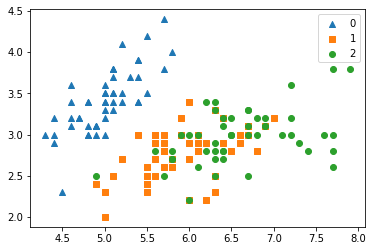

In [7]:
markers = ['^','s','o']
for i, marker in enumerate(markers):
    x_axis_data = df[df['kind'] == i]['ft1']
    y_axis_data = df[df['kind'] == i]['ft2']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=i)
plt.legend()
plt.show

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [9]:
df_scaled = scaler.fit_transform(df.iloc[:,:4])

In [10]:
df_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #차원수 지정
a = pca.fit(df_scaled) # PCA 개체 만들기
df_pca = pca.transform(df_scaled) # PCA 적용
df_pca

array([[-2.26454173e+00,  5.05703903e-01],
       [-2.08642550e+00, -6.55404729e-01],
       [-2.36795045e+00, -3.18477311e-01],
       [-2.30419716e+00, -5.75367713e-01],
       [-2.38877749e+00,  6.74767397e-01],
       [-2.07053681e+00,  1.51854856e+00],
       [-2.44571134e+00,  7.45626750e-02],
       [-2.23384186e+00,  2.47613932e-01],
       [-2.34195768e+00, -1.09514636e+00],
       [-2.18867576e+00, -4.48629048e-01],
       [-2.16348656e+00,  1.07059558e+00],
       [-2.32737775e+00,  1.58587455e-01],
       [-2.22408272e+00, -7.09118158e-01],
       [-2.63971626e+00, -9.38281982e-01],
       [-2.19229151e+00,  1.88997851e+00],
       [-2.25146521e+00,  2.72237108e+00],
       [-2.20275048e+00,  1.51375028e+00],
       [-2.19017916e+00,  5.14304308e-01],
       [-1.89407429e+00,  1.43111071e+00],
       [-2.33994907e+00,  1.15803343e+00],
       [-1.91455639e+00,  4.30465163e-01],
       [-2.20464540e+00,  9.52457317e-01],
       [-2.77416979e+00,  4.89517027e-01],
       [-1.

In [12]:
pca_names = ['pca1','pca2']
df_pca = pd.DataFrame(df_pca, columns = pca_names)

In [13]:
df_pca['setosa'] = df['setosa']
df_pca['versicolor'] = df['versicolor']
df_pca['virginica'] = df['virginica']
df_pca['kind'] = df['kind']

In [14]:
df_pca

,pca1,pca2,setosa,versicolor,virginica,kind
0,-2.264542,0.505704,1,0,0,0
1,-2.086426,-0.655405,1,0,0,0
2,-2.367950,-0.318477,1,0,0,0
3,-2.304197,-0.575368,1,0,0,0
4,-2.388777,0.674767,1,0,0,0
...,...,...,...,...,...,...
145,1.870522,0.382822,0,0,1,2
146,1.558492,-0.905314,0,0,1,2
147,1.520845,0.266795,0,0,1,2
148,1.376391,1.016362,0,0,1,2


<function matplotlib.pyplot.show(close=None, block=None)>

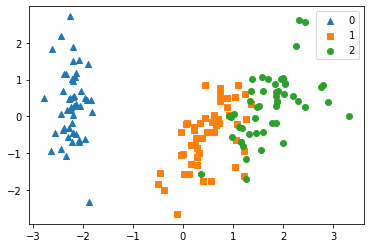

In [15]:
markers = ['^','s','o']
for i, marker in enumerate(markers):
    x_axis_data = df_pca[df_pca['kind'] == i]['pca1']
    y_axis_data = df_pca[df_pca['kind'] == i]['pca2']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=i)
plt.legend()
plt.show

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [17]:
rcf = RandomForestClassifier(random_state=100) # 랜덤스테이트를 고정해 놓아야 같은 결과
scores = cross_val_score(rcf, df.iloc[:,:4],df['kind'],scoring='accuracy',cv=3)

In [18]:
df.iloc[:,:4]

,ft1,ft2,ft3,ft4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
df_pca['pca1']

0     -2.264542
1     -2.086426
2     -2.367950
3     -2.304197
4     -2.388777
         ...   
145    1.870522
146    1.558492
147    1.520845
148    1.376391
149    0.959299
Name: pca1, Length: 150, dtype: float64

In [20]:
scores

array([0.98, 0.94, 0.96])

In [21]:
rcf = RandomForestClassifier(random_state=100) # 랜덤스테이트를 고정해 놓아야 같은 결과
scores = cross_val_score(rcf, df_pca.iloc[:,:1],df_pca['kind'],scoring='accuracy',cv=3)
scores

array([0.9 , 0.92, 0.9 ])